In [1]:
from IPython.display import clear_output

In [2]:
clear_output()

In [3]:
import tf_explain

In [4]:
from tf_explain.core.grad_cam import GradCAM

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import utils
import os
%matplotlib inline

import tensorflow as tf
from skimage.color import rgb2gray
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Flatten, Dense, Reshape, Multiply, Add,UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import tensorflow as tf
from keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
# from livelossplot import PlotLossesTensorFlowKeras
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.17.0


In [6]:
import numpy as np
import pandas as pd
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [7]:
data_path = 'ckplus/CK+48'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]

cnt = 0
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        cnt += 1
        img_data_list.append(input_img_resize)
    print(cnt)
    cnt = 0
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-anger

135
Loaded the images of dataset-contempt

54
Loaded the images of dataset-disgust

177
Loaded the images of dataset-fear

75
Loaded the images of dataset-happy

207
Loaded the images of dataset-sadness

84
Loaded the images of dataset-surprise

249


(981, 48, 48, 3)

In [8]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [9]:
num_of_samples

981

In [10]:


# labels[0:248]=0 #249
# labels[249:323]=1 #75
# labels[324:407]=2 #84
# labels[408:584]=3 #177
# labels[585:638]=4 #54
# labels[639:845]=5 #207
# labels[846:980]=6 #135

labels[0:135] = 0
labels[135:189] = 1
labels[189:366] = 2
labels[366:441] = 3
labels[441:648] = 4
labels[648:732] = 5
labels[732:] = 6

# names = ['surprise','fear','sadness','disgust' ,'contempt','happy','anger']
names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [11]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(labels, num_classes)

from sklearn.utils import shuffle
x, y = shuffle(img_data, Y, random_state=2)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
x_test = X_test


In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [13]:
model_resnet = Sequential()

model_resnet.add(base_model)

model_resnet.add(GlobalAveragePooling2D())

model_resnet.add(Dense(512, activation='relu'))

# dropout for regularization
model_resnet.add(Dropout(0.5))

model_resnet.add(Dense(7, activation='softmax'))

In [14]:
callbacks = [ModelCheckpoint('model.keras',monitor="val_accuracy", verbose=1, save_best_only=True),
            ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=20, verbose=1, min_lr=1e-6),
            #ShowProgress(),
            EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=100)]

In [15]:
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history_resnet = model_resnet.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.2438 - loss: 2.5758
Epoch 1: val_accuracy improved from -inf to 0.31757, saving model to model.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 33s 462ms/step - accuracy: 0.2470 - loss: 2.5586 - val_accuracy: 0.3176 - val_loss: 3.0399 - learning_rate: 1.0000e-04
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.6324 - loss: 0.9989
Epoch 2: val_accuracy did not improve from 0.31757
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.6334 - loss: 0.9967 - val_accuracy: 0.3176 - val_loss: 6.2051 - learning_rate: 1.0000e-04
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.8139 - loss: 0.6172
Epoch 3: val_accuracy did not improve from 0.31757
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 357ms/step - accuracy: 0.8143 - loss: 0.6153 - val_accuracy: 0.3176 - val_loss: 18.5222 - learning_rate: 1.0000e-04
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.8894 - loss: 0.3612
Epoch 4: val_accuracy did not 

In [20]:

resnet_scores = model_resnet.evaluate(X_test, y_test, verbose=0)


resnet_accuracy = resnet_scores[1]
resnet_loss = resnet_scores[0]

print("ResNet Model - Accuracy: {:.2f}% | Loss: {:.4f}".format(resnet_accuracy * 100, resnet_loss))

ResNet Model - Accuracy: 96.62% | Loss: 0.108


<Figure size 2000x1000 with 0 Axes>

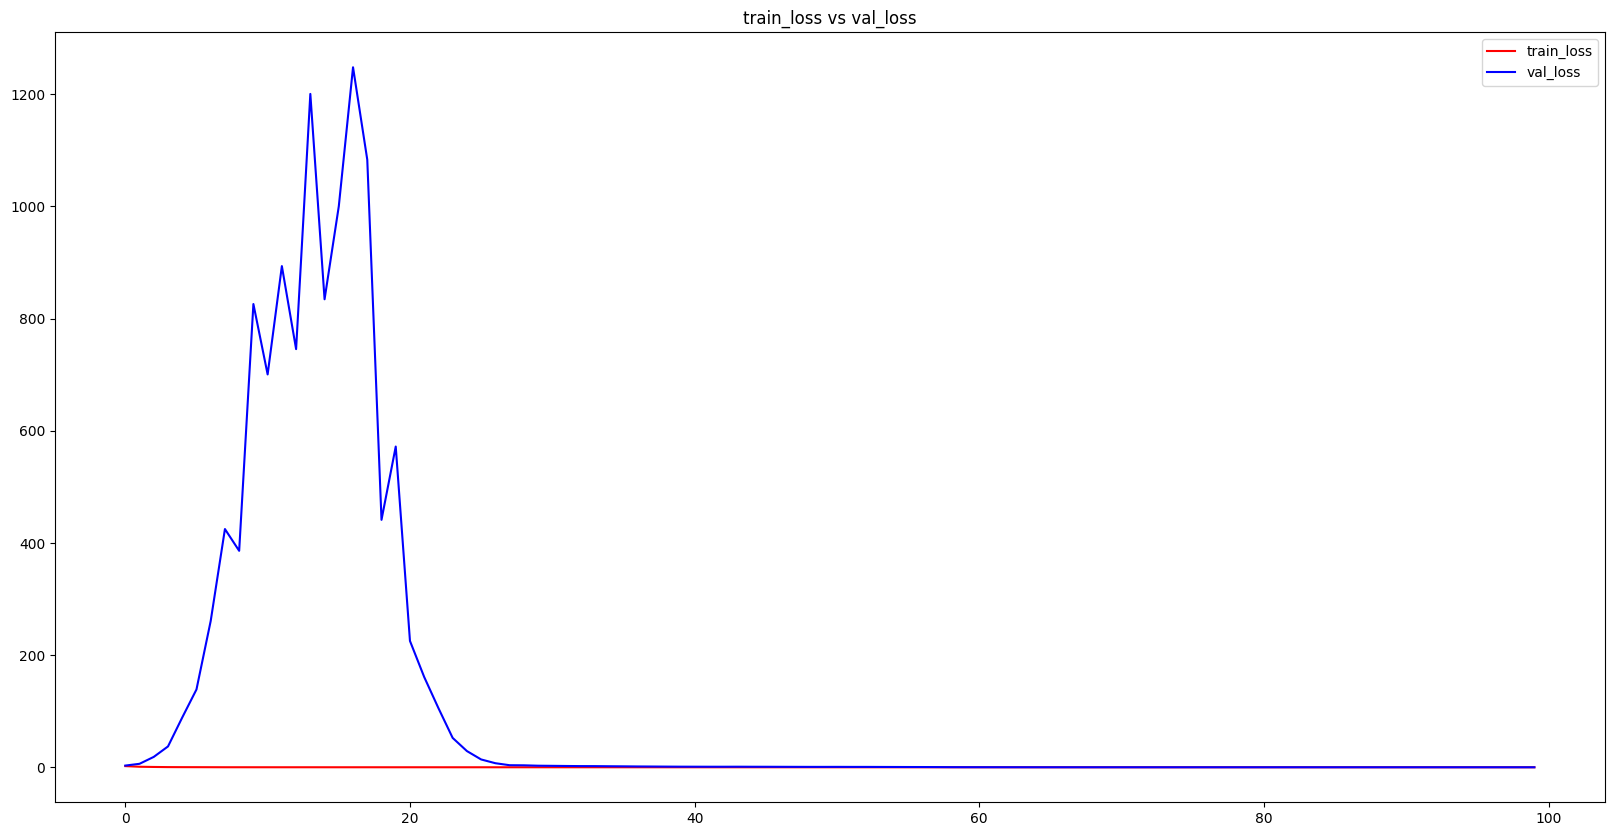

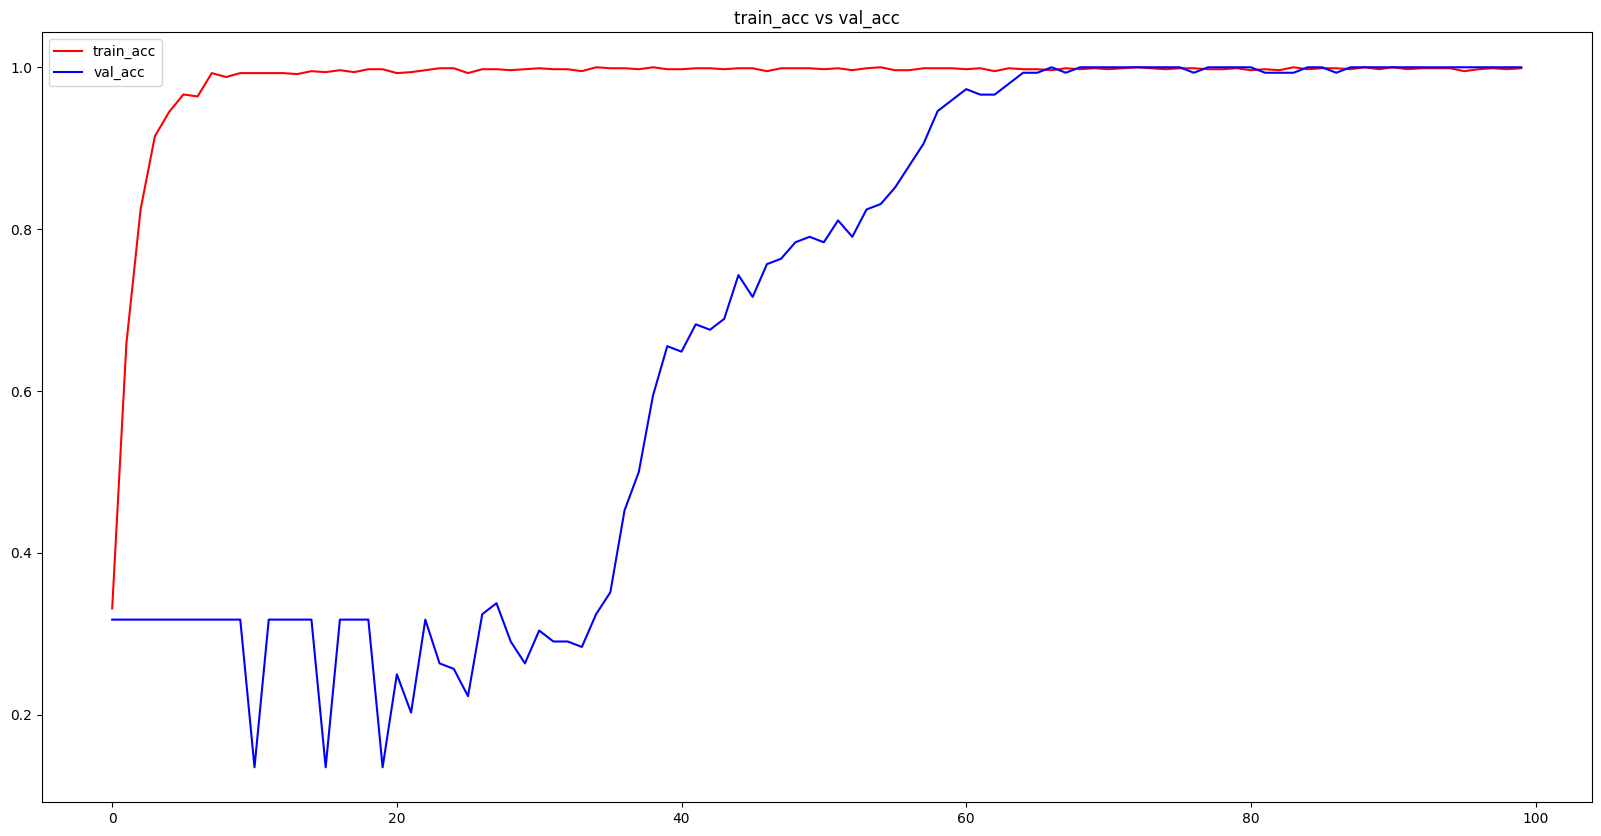

<Figure size 2000x1000 with 0 Axes>

In [17]:
# losses and accuracy
%matplotlib inline

train_loss=history_resnet.history['loss']
val_loss=history_resnet.history['val_loss']
train_acc=history_resnet.history['accuracy']
val_acc=history_resnet.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


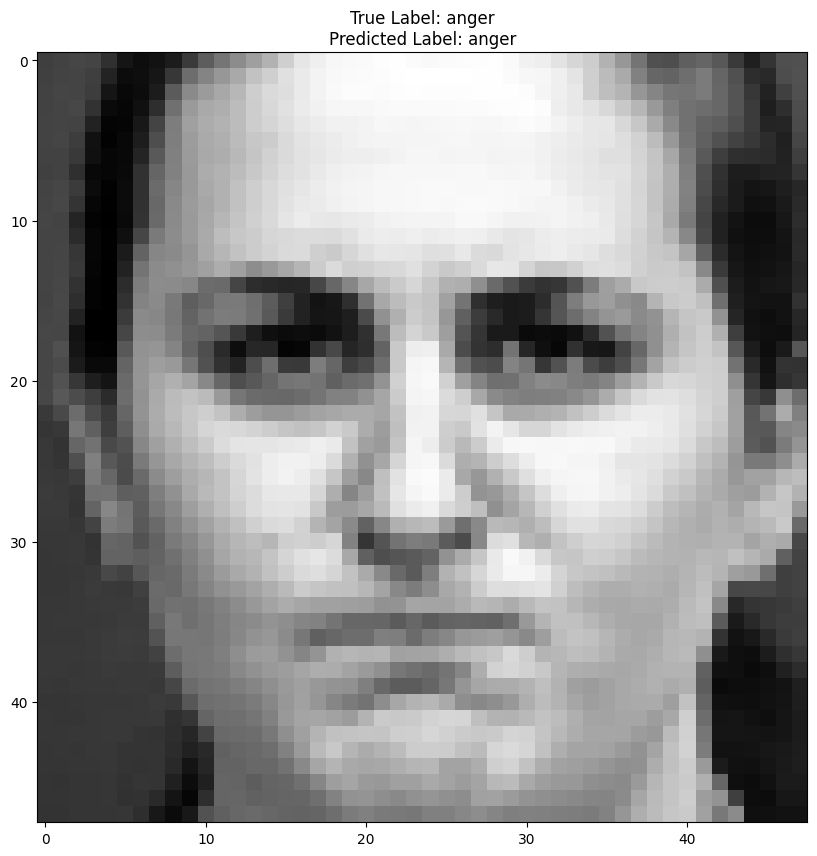

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Choose a test image to make predictions on
test_image_index = 101  # Replace with the index of the test image you want to use

# Get the test image and its corresponding true label
test_image = X_test[test_image_index]
true_label = getLabel(np.argmax(y_test[test_image_index]))

# Make predictions on the test image using the ResNet-based model
predictions = model_resnet.predict(np.expand_dims(test_image, axis=0))
predicted_label_index = np.argmax(predictions)
predicted_label = getLabel(predicted_label_index)

# Display the test image and its predicted label
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}")
plt.show()